In [ ]:
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-09-25 05:25:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  52.2MB/s    in 2.0s    

2022-09-25 05:25:08 (52.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip_ref=zipfile.ZipFile("pizza_steak.zip")

In [ ]:
zip_ref.extractall()

In [ ]:
zip_ref.close()

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

for dirpaths,dirnames,filename in os.walk("pizza_steak"):
  print(f"the directory:{dirpaths} has this many folders {len(dirnames)} and with this many files {len(filename)}")

the directory:pizza_steak has this many folders 2 and with this many files 0
the directory:pizza_steak/train has this many folders 2 and with this many files 0
the directory:pizza_steak/train/pizza has this many folders 0 and with this many files 750
the directory:pizza_steak/train/steak has this many folders 0 and with this many files 750
the directory:pizza_steak/test has this many folders 2 and with this many files 0
the directory:pizza_steak/test/pizza has this many folders 0 and with this many files 250
the directory:pizza_steak/test/steak has this many folders 0 and with this many files 250


In [ ]:
import cv2

In [ ]:
x=cv2.imread("pizza_steak/train/pizza/3314176.jpg")
x=cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

In [ ]:
import matplotlib.pyplot as plt

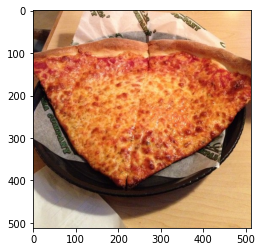

In [ ]:
plt.imshow(x,cmap="gray")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_url="/content/pizza_steak/train"
test_url="/content/pizza_steak/test"

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_data=train_datagen.flow_from_directory(directory=train_url,
                                             target_size=(224,224),
                                             class_mode="binary",batch_size=32)

test_data=test_datagen.flow_from_directory(
    directory=test_url,
    target_size=(224,224),
    class_mode="binary",
    batch_size=32
)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="valid"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history=model_1.fit(train_data,epochs=10,steps_per_epoch=len(train_data))

Epoch 1/10
47/47 [==============================] - 19s 147ms/step - loss: 0.5800 - accuracy: 0.6893
Epoch 2/10
47/47 [==============================] - 7s 143ms/step - loss: 0.4668 - accuracy: 0.8047
Epoch 3/10
47/47 [==============================] - 7s 143ms/step - loss: 0.4290 - accuracy: 0.8127
Epoch 4/10
47/47 [==============================] - 7s 144ms/step - loss: 0.3990 - accuracy: 0.8367
Epoch 5/10
47/47 [==============================] - 7s 142ms/step - loss: 0.3768 - accuracy: 0.8400
Epoch 6/10
47/47 [==============================] - 7s 142ms/step - loss: 0.3448 - accuracy: 0.8560
Epoch 7/10
47/47 [==============================] - 7s 141ms/step - loss: 0.2773 - accuracy: 0.8893
Epoch 8/10
47/47 [==============================] - 7s 144ms/step - loss: 0.2311 - accuracy: 0.9113
Epoch 9/10
47/47 [==============================] - 7s 142ms/step - loss: 0.1891 - accuracy: 0.9313
Epoch 10/10
47/47 [==============================] - 7s 143ms/step - loss: 0.1211 - accuracy: 0.957

In [ ]:
y_pred=tf.round(model_1.predict(test_data))

In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 130ms/step - loss: 0.4080 - accuracy: 0.8580


[0.40797120332717896, 0.8579999804496765]

In [ ]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history=model_2.fit(train_data,epochs=10,steps_per_epoch=len(train_data))

Epoch 1/10
47/47 [==============================] - 7s 129ms/step - loss: 5.6263 - accuracy: 0.6447
Epoch 2/10
47/47 [==============================] - 6s 132ms/step - loss: 1.1371 - accuracy: 0.7053
Epoch 3/10
47/47 [==============================] - 6s 130ms/step - loss: 1.4239 - accuracy: 0.6900
Epoch 4/10
47/47 [==============================] - 6s 129ms/step - loss: 0.8127 - accuracy: 0.7553
Epoch 5/10
47/47 [==============================] - 6s 129ms/step - loss: 0.5104 - accuracy: 0.7893
Epoch 6/10
47/47 [==============================] - 6s 130ms/step - loss: 0.3983 - accuracy: 0.8273
Epoch 7/10
47/47 [==============================] - 6s 130ms/step - loss: 0.4566 - accuracy: 0.8107
Epoch 8/10
47/47 [==============================] - 6s 129ms/step - loss: 0.3352 - accuracy: 0.8533
Epoch 9/10
47/47 [==============================] - 6s 129ms/step - loss: 0.4751 - accuracy: 0.8293
Epoch 10/10
47/47 [==============================] - 6s 129ms/step - loss: 0.6737 - accuracy: 0.7813

In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 2s 125ms/step - loss: 0.4712 - accuracy: 0.8160


[0.4712061882019043, 0.8159999847412109]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


lets learn froms scratch

In [ ]:
!nvidia-smi

Sun Sep 25 05:27:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    28W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_url="/content/pizza_steak/train"
test_url="/content/pizza_steak/test"

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/225.)

In [ ]:
train_data=train_datagen.flow_from_directory(directory=train_url,target_size=(224,224),class_mode="binary",batch_size=32)
test_data=test_datagen.flow_from_directory(directory=test_url,target_size=(224,224),class_mode="binary",batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=train_data.next()

Text(0.5, 1.0, '1.0')

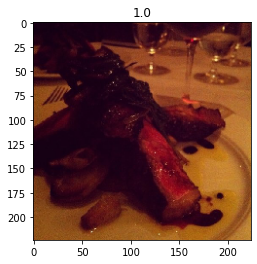

In [ ]:
plt.imshow(images[31])
plt.title(labels[31])

In [ ]:
labels

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
      dtype=float32)

In [ ]:
images

array([[[[0.03921569, 0.05882353, 0.04313726],
         [0.03529412, 0.05490196, 0.03921569],
         [0.0509804 , 0.07058824, 0.05490196],
         ...,
         [0.3137255 , 0.30588236, 0.22352943],
         [0.3254902 , 0.31764707, 0.23529413],
         [0.30980393, 0.2901961 , 0.20392159]],

        [[0.05490196, 0.07058824, 0.06666667],
         [0.04313726, 0.0627451 , 0.04705883],
         [0.04313726, 0.0627451 , 0.04705883],
         ...,
         [0.30588236, 0.29411766, 0.21960786],
         [0.2627451 , 0.2509804 , 0.1764706 ],
         [0.31764707, 0.29803923, 0.22352943]],

        [[0.0509804 , 0.06666667, 0.0627451 ],
         [0.0509804 , 0.06666667, 0.0627451 ],
         [0.0509804 , 0.07058824, 0.05490196],
         ...,
         [0.32941177, 0.32156864, 0.2627451 ],
         [0.33333334, 0.32156864, 0.2627451 ],
         [0.3254902 , 0.3137255 , 0.25490198]],

        ...,

        [[0.02352941, 0.03137255, 0.01176471],
         [0.01960784, 0.02745098, 0.00784314]

In [ ]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,input_shape=(224,224,3),padding="valid",activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history=model_3.fit(train_data,epochs=10,steps_per_epoch=len(train_data),validation_data=(test_data))

Epoch 1/10
47/47 [==============================] - 10s 197ms/step - loss: 1.1519 - accuracy: 0.6927 - val_loss: 0.4204 - val_accuracy: 0.7920
Epoch 2/10
47/47 [==============================] - 9s 185ms/step - loss: 0.3990 - accuracy: 0.8307 - val_loss: 0.3567 - val_accuracy: 0.8680
Epoch 3/10
47/47 [==============================] - 9s 186ms/step - loss: 0.2605 - accuracy: 0.9007 - val_loss: 0.3784 - val_accuracy: 0.8440
Epoch 4/10
47/47 [==============================] - 9s 188ms/step - loss: 0.1622 - accuracy: 0.9427 - val_loss: 0.3618 - val_accuracy: 0.8480
Epoch 5/10
47/47 [==============================] - 9s 188ms/step - loss: 0.0808 - accuracy: 0.9833 - val_loss: 0.4311 - val_accuracy: 0.8240
Epoch 6/10
47/47 [==============================] - 9s 188ms/step - loss: 0.0401 - accuracy: 0.9933 - val_loss: 0.4776 - val_accuracy: 0.8080
Epoch 7/10
47/47 [==============================] - 9s 186ms/step - loss: 0.0161 - accuracy: 0.9987 - val_loss: 0.6345 - val_accuracy: 0.8260
Epoch

In [ ]:
model_3.summary(
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_4 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.evaluate(test_data)

16/16 [==============================] - 2s 133ms/step - loss: 0.7356 - accuracy: 0.8160


[0.7356065511703491, 0.8159999847412109]

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_4 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd

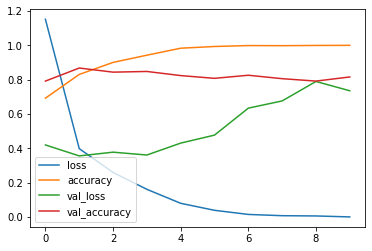

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.151851,0.692667,0.420370,0.792
1,0.398968,0.830667,0.356663,0.868
2,0.260471,0.900667,0.378352,0.844
3,0.162221,0.942667,0.361820,0.848
4,0.080821,0.983333,0.431111,0.824
5,0.040115,0.993333,0.477621,0.808
6,0.016081,0.998667,0.634531,0.826
7,0.008758,0.998000,0.676550,0.806
8,0.007205,0.999333,0.789791,0.792
9,0.001632,1.000000,0.735606,0.816


In [ ]:
def plotting(history):
  his=pd.DataFrame(history.history)
  loss=his["loss"]
  val_loss=his["val_loss"]
  acc=his["accuracy"]
  val_acc=his["val_accuracy"]
  epochs=range(len(history.history["loss"]))

  plt.figure()
  plt.plot(epochs,loss)
  plt.plot(epochs,val_loss)
  plt.title("loss")
  plt.legend();

  plt.figure()
  plt.plot(epochs,acc)
  plt.plot(epochs,val_acc)
  plt.title("accuracy")

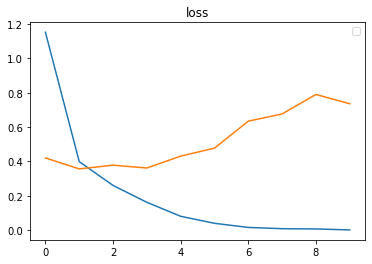

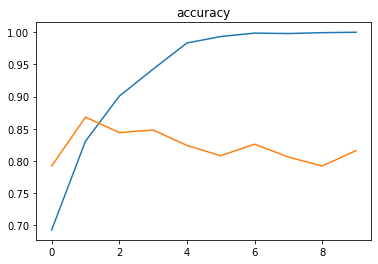

In [ ]:
plotting(history)

In [ ]:
model_4=tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",input_shape=(224,224,3),activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=(test_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6125 - accuracy: 0.6600 - val_loss: 0.4753 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4707 - accuracy: 0.7853 - val_loss: 0.4051 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4010 - accuracy: 0.8227 - val_loss: 0.3361 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3754 - accuracy: 0.8440 - val_loss: 0.3418 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.3525 - accuracy: 0.8507 - val_loss: 0.3172 - val_accuracy: 0.8680


In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 129ms/step - loss: 0.3172 - accuracy: 0.8680


[0.31716859340667725, 0.8679999709129333]

In [ ]:
traindata_gen_aug=ImageDataGenerator(rescale=1/255.,
                                rotation_range=0.2,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

traindata_gen=ImageDataGenerator(rescale=1/255.)


testdata_gen=ImageDataGenerator(rescale=1/255.)



In [ ]:
train_data_aug=traindata_gen_aug.flow_from_directory(directory=train_url,target_size=(224,224),batch_size=32,class_mode="binary",shuffle=True)

train_data=traindata_gen.flow_from_directory(directory=train_url,target_size=(224,224),class_mode="binary",shuffle=True)

test_data=testdata_gen.flow_from_directory(directory=test_url,target_size=(224,224),class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=train_data.next()
aug_images,_=train_data_aug.next()

In [ ]:
import random


Text(0.5, 1.0, 'augementation')

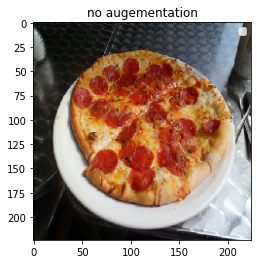

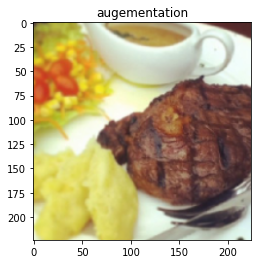

In [ ]:
rand_int=random.randint(0,32)

plt.figure()
plt.imshow(images[rand_int])
plt.title("no augementation")
plt.legend()
plt.figure()
plt.imshow(aug_images[rand_int])
plt.title("augementation")

In [ ]:
model_5=tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,input_shape=(224,224,3),activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Conv2D(10,3,1,activation="relu"),
        tf.keras.layers.MaxPool2D(),
     tf.keras.layers.Conv2D(10,3,1,activation="relu"),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_5=model_5.fit(train_data_aug,epochs=5,validation_data=(test_data),steps_per_epoch=len(train_data_aug),validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 451ms/step - loss: 0.6560 - accuracy: 0.6107 - val_loss: 0.5260 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 23s 481ms/step - loss: 0.5386 - accuracy: 0.7413 - val_loss: 0.3852 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 21s 439ms/step - loss: 0.4863 - accuracy: 0.7653 - val_loss: 0.3565 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 21s 439ms/step - loss: 0.4821 - accuracy: 0.7760 - val_loss: 0.3504 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 21s 441ms/step - loss: 0.4604 - accuracy: 0.7920 - val_loss: 0.3487 - val_accuracy: 0.8680


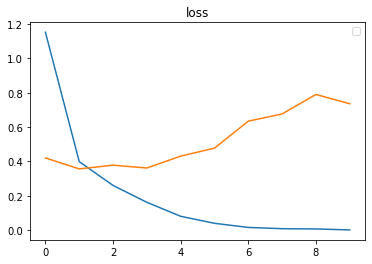

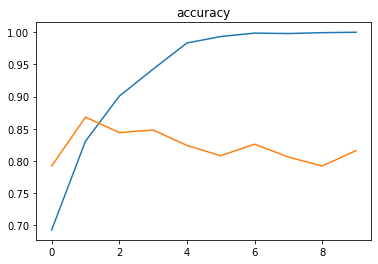

In [ ]:
plotting(history)

In [ ]:
model_cnn=tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32,3,1,activation="relu"),
     tf.keras.layers.Conv2D(32,3,1,activation="relu"),
     tf.keras.layers.MaxPool2D(2),
     tf.keras.layers.Conv2D(32,3,1,activation="relu"),
     tf.keras.layers.Conv2D(32,3,1,activation="relu"),
     tf.keras.layers.MaxPool2D(2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)

model_cnn.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer="Adam",
    metrics=["accuracy"]
)

history_5=model_cnn.fit(train_data_aug,epochs=5,validation_data=(test_data),steps_per_epoch=len(train_data_aug),validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 488ms/step - loss: 0.6425 - accuracy: 0.6400 - val_loss: 0.5071 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 22s 463ms/step - loss: 0.5262 - accuracy: 0.7593 - val_loss: 0.4074 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 22s 461ms/step - loss: 0.5145 - accuracy: 0.7460 - val_loss: 0.4352 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 22s 462ms/step - loss: 0.4916 - accuracy: 0.7687 - val_loss: 0.3618 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4931 - accuracy: 0.7720 - val_loss: 0.3882 - val_accuracy: 0.8300


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 

--2022-09-25 05:41:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2022-09-25 05:41:49 (219 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [ ]:
import cv2


In [ ]:
img=cv2.imread("03-steak.jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [ ]:
img

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

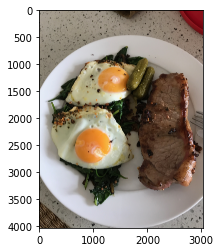

In [ ]:
plt.imshow(img)

In [ ]:
def reshape(filename,img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  return img/255.

In [ ]:
img=reshape("03-steak.jpeg")

In [ ]:
model_cnn.predict(tf.expand_dims(img,axis=0))

array([[0.7770748]], dtype=float32)

In [ ]:
ans1={0:"PIZZA",1:"STEAK"}

In [ ]:
a=model_cnn.predict(tf.expand_dims(img,axis=0))

In [ ]:
a=tf.cast(tf.round(a),dtype=tf.int32)

In [ ]:
ans[tf.squeeze(a).numpy()]

'STEAK'

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

In [ ]:
ans=reshape("03-pizza-dad.jpeg")

In [ ]:
ans=model_cnn.predict(tf.expand_dims(ans,axis=0))

In [ ]:
ans1[int(tf.round(ans))]